In [ ]:
import cv2
from google.colab.patches import cv2_imshow

webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

while webcam.isOpened():
    status, frame = webcam.read()

    if status:
        cv2.imshow("test", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

webcam.release()
cv2.destroyAllWindows()

Could not open webcam


# 코랩용 웹캠

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
#HOME = os.getcwd()
HOME = '/content/drive/MyDrive/Colab/Immersive/knife_detection'
print(HOME)

%cd {HOME}

/content/drive/MyDrive/Colab/Immersive/knife_detection
/content/drive/MyDrive/Colab/Immersive/knife_detection


In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


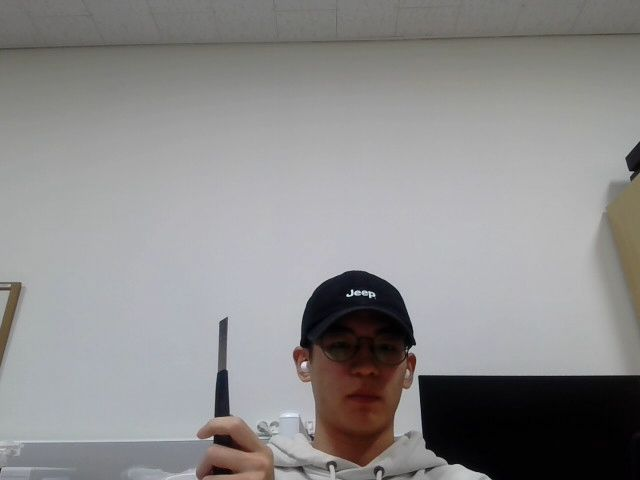

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import time
import os

def create_directory_if_not_exists(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

def take_photos(interval=0.5, num_photos=5, quality=0.8, base_filename='photo', output_directory='Image'):
    create_directory_if_not_exists(output_directory)
    for i in range(num_photos):
        filename = os.path.join(output_directory, f'{base_filename}_{i + 1}.jpg')
        js = Javascript('''
            async function takePhoto(quality) {
                const div = document.createElement('div');
                const video = document.createElement('video');
                video.style.display = 'block';
                const stream = await navigator.mediaDevices.getUserMedia({video: true});

                document.body.appendChild(video);
                video.srcObject = stream;
                await video.play();

                const canvas = document.createElement('canvas');
                canvas.width = video.videoWidth;
                canvas.height = video.videoHeight;

                const img = document.createElement('img');

                document.body.appendChild(canvas);
                canvas.getContext('2d').drawImage(video, 0, 0);
                stream.getVideoTracks()[0].stop();
                document.body.appendChild(img);

                // Wait for a brief moment before taking the next photo
                await new Promise(resolve => setTimeout(resolve, 500));

                return canvas.toDataURL('image/jpeg', quality);
            }
        ''')
        display(js)
        data = eval_js('takePhoto({})'.format(quality))
        binary = b64decode(data.split(',')[1])
        with open(filename, 'wb') as f:
            f.write(binary)
        print(f'Saved {filename}')
        time.sleep(interval)

# 사용 예시: 5개의 이미지를 0.5초 간격으로 캡처하여 "Image" 폴더에 저장합니다.
take_photos(num_photos=5, interval=0.5, quality=0.8, output_directory='Image')

<IPython.core.display.Javascript object>

Saved Image/photo_1.jpg


<IPython.core.display.Javascript object>

Saved Image/photo_2.jpg


<IPython.core.display.Javascript object>

Saved Image/photo_3.jpg


<IPython.core.display.Javascript object>

KeyboardInterrupt: ignored